Component: Fueling System
  Port: Port 1 -> Connected Component: Plasma, Connected Port: Port 2
  Port: Port 7 -> Connected Component: IFC, Connected Port: Port 5
Component: Plasma
  Port: Port 2 -> Connected Component: Fueling System, Connected Port: Port 1
  Port: Port 3 -> Connected Component: IFC, Connected Port: Port 4
Component: IFC
  Port: Port 4 -> Connected Component: Plasma, Connected Port: Port 3
  Port: Port 5 -> Connected Component: Fueling System, Connected Port: Port 7
  Port: Port 8 -> Connected Component: OFC, Connected Port: Port 6
Component: OFC
  Port: Port 6 -> Connected Component: IFC, Connected Port: Port 8


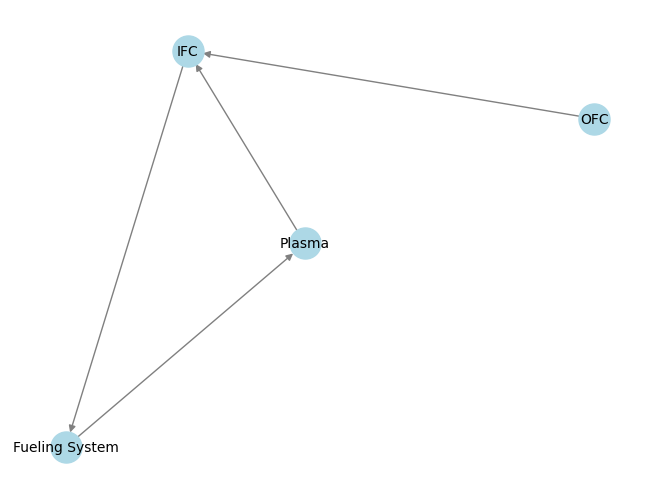

[0.7, 0, 0, 0]
{'d_hyd': '0.01', 'thick': '0.0021', 'T': '800', 'T_FLiBe': 'T', 'U0': '2', 'L': '4', 'T_w': 'T', 'D_St': '1e-09', 'K_H': '0.000454', 'K_S': '0.00441', 'D_flibe': '1.6829270990116207e-09', 'A_ch': 'pi*d_hyd^2/4', 'c0': '0.000312607334568247'}
0.22284857592815843 1.7447353872128006


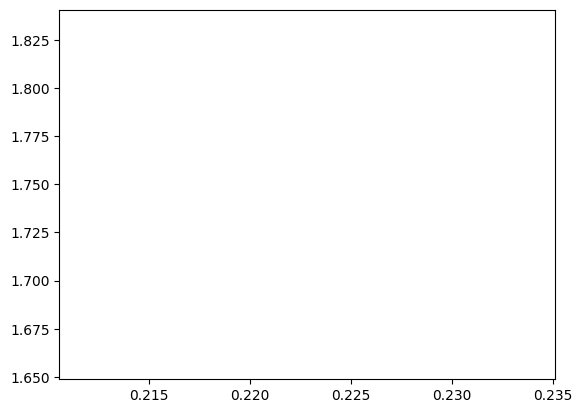

In [1]:
###IMPORT MODULES
import numpy as np 
from tools.component_tools import Component
from tools.component_tools import Fluid
from tools.component_tools import Membrane
import tools.materials as materials
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from tools.component_tools import BreedingBlanket
import mph 
U_0vec=np.array([1,2])
eff_coms_v=np.array([])
eff_py=np.array([])

# for U0 in U_0vec:
U0=2
T=800
c0=0
mat=materials.Flibe(T)
T_hot_prim=900
T_cold_prim=800
Q=1E9
d_hyd=0.01
L=4
D=1E-9
thick=2.1E-3
K_S=4.41E-3
k_d=1E6
k_r=1E6
K_H=mat.Solubility

flibe=Fluid(T=T, Solubility=mat.Solubility, MS=True,D=mat.D, d_Hyd=d_hyd ,mu=mat.mu,rho=mat.rho,U0=U0, c0=c0,k=mat.k,
        cp=mat.cp)
BB=BreedingBlanket(Q=Q,TBR=1.08,T_out=T_hot_prim,T_in=T_cold_prim,fluid=flibe )
BB.get_cout()
c0=BB.c_out
flibe=Fluid(T=T, Solubility=mat.Solubility, MS=True,D=mat.D, d_Hyd=d_hyd ,mu=mat.mu,rho=mat.rho,U0=U0, c0=c0,k=mat.k,
        cp=mat.cp)
var_vec=[T,c0,d_hyd,L,D,thick,K_S,K_H,mat.D,U0]
var_vec_str=['T','c0','d_hyd','L','D_St','thick','K_S','K_H','D_flibe','U0']
Steel = Membrane( T=T,
        D=D,
        thick=thick,
        K_S=K_S,
        k_d=k_d,
        k_r=k_r,k=21)
flibe.update_attribute('c0',c0)
PAV = Component(c_in=c0,  fluid=flibe, membrane=Steel)
PAV.get_adimensionals()
U = PAV.get_global_HX_coeff(0)
PAV.get_efficiency(L,plotvar=False)
client = mph.start()
model = client.load('PAV_MS.mph')


for i,var in enumerate(var_vec):
        model.parameter(var_vec_str[i], str(var))
model.mesh()


a=model.parameters()
print(a)

model.solve()
eff_coms=model.evaluate(['r','z','eff'],'Study 1//Solution 1')
model.reset()


eff_coms=np.average(eff_coms)
eff_coms_v=np.append(eff_coms_v,eff_coms)
plt.plot((1-PAV.eff)*100,eff_coms)
print((1-PAV.eff)*100,eff_coms)
eff_py=np.append(eff_py,PAV.eff)


In [2]:

PAV.inspect()


c_in: 0.000312607334568247
eff: 0.9977715142407184
fluid: <tools.component_tools.Fluid object at 0x000002309D3E7ED0>
membrane: <tools.component_tools.Membrane object at 0x000002309D2B0E90>
H: 33385679257738.254
W: 790282483978796.2
U: 621.1695997282021
J_perm: -1.7406301448110833e-09


In [2]:
PAV.get_adimensionals()
PAV.inspect()
print(PAV.H/PAV.W)

NameError: name 'PAV' is not defined